<a href="https://colab.research.google.com/github/SriNithin965/project-4-2/blob/main/code/LSTM_FUTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
!pip install pandas==1.2.0
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [307]:
import pandas as pd
import numpy as np

In [308]:
data = pd.read_excel('https://github.com/SriNithin965/project-4-2/raw/main/data/Sample-Superstore.xls')

In [309]:
data1 = data[['Ship Date','Sales']]
data1 = data1.groupby('Ship Date').sum()
data1 = data1.resample('MS').median()
data1.head(10)

,Sales
Ship Date,
2014-01-01,149.950
2014-02-01,112.411
2014-03-01,483.546
2014-04-01,680.252
2014-05-01,504.828
2014-06-01,656.066
2014-07-01,504.586
2014-08-01,884.666
2014-09-01,947.648


In [310]:
num = data1.values

In [311]:
num1 = num/min(num)
num1

array([[ 1.33394419],
       [ 1.        ],
       [ 4.3015897 ],
       [ 6.05147183],
       [ 4.49091281],
       [ 5.83631495],
       [ 4.48876   ],
       [ 7.86992376],
       [ 8.43020701],
       [ 5.9868963 ],
       [19.59643184],
       [12.90169112],
       [ 8.91275765],
       [ 1.71976052],
       [ 7.73563975],
       [ 5.7530046 ],
       [ 5.45941234],
       [ 5.06175552],
       [ 8.17637954],
       [ 4.87140938],
       [20.07292881],
       [ 8.80189661],
       [17.27444823],
       [13.23658717],
       [ 5.14900677],
       [ 4.50911388],
       [ 6.68817553],
       [10.10991807],
       [ 7.11310281],
       [ 8.69147148],
       [ 9.10441149],
       [ 7.56666163],
       [19.28581722],
       [ 5.76150021],
       [18.16295113],
       [26.20554038],
       [ 5.54403484],
       [ 6.53475194],
       [ 9.80712742],
       [ 8.16737686],
       [11.03626869],
       [10.04383913],
       [10.05861526],
       [13.97736876],
       [26.54211776],
       [11

In [312]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [313]:
n_steps = 3
# split into samples
X, y = prepare_data(num1, n_steps)

In [314]:
print(X),print(y)

[[[ 1.33394419]
  [ 1.        ]
  [ 4.3015897 ]]

 [[ 1.        ]
  [ 4.3015897 ]
  [ 6.05147183]]

 [[ 4.3015897 ]
  [ 6.05147183]
  [ 4.49091281]]

 [[ 6.05147183]
  [ 4.49091281]
  [ 5.83631495]]

 [[ 4.49091281]
  [ 5.83631495]
  [ 4.48876   ]]

 [[ 5.83631495]
  [ 4.48876   ]
  [ 7.86992376]]

 [[ 4.48876   ]
  [ 7.86992376]
  [ 8.43020701]]

 [[ 7.86992376]
  [ 8.43020701]
  [ 5.9868963 ]]

 [[ 8.43020701]
  [ 5.9868963 ]
  [19.59643184]]

 [[ 5.9868963 ]
  [19.59643184]
  [12.90169112]]

 [[19.59643184]
  [12.90169112]
  [ 8.91275765]]

 [[12.90169112]
  [ 8.91275765]
  [ 1.71976052]]

 [[ 8.91275765]
  [ 1.71976052]
  [ 7.73563975]]

 [[ 1.71976052]
  [ 7.73563975]
  [ 5.7530046 ]]

 [[ 7.73563975]
  [ 5.7530046 ]
  [ 5.45941234]]

 [[ 5.7530046 ]
  [ 5.45941234]
  [ 5.06175552]]

 [[ 5.45941234]
  [ 5.06175552]
  [ 8.17637954]]

 [[ 5.06175552]
  [ 8.17637954]
  [ 4.87140938]]

 [[ 8.17637954]
  [ 4.87140938]
  [20.07292881]]

 [[ 4.87140938]
  [20.07292881]
  [ 8.80189661]]



(None, None)

In [315]:
X.shape

(46, 3, 1)

In [316]:
y.shape

(46, 1)

In [317]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [318]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [319]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 3s 17ms/step - loss: 142.1058
Epoch 2/300
2/2 [==============================] - 0s 14ms/step - loss: 139.4515
Epoch 3/300
2/2 [==============================] - 0s 13ms/step - loss: 136.5150
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 133.5575
Epoch 5/300
2/2 [==============================] - 0s 12ms/step - loss: 130.0761
Epoch 6/300
2/2 [==============================] - 0s 14ms/step - loss: 126.1175
Epoch 7/300
2/2 [==============================] - 0s 12ms/step - loss: 121.1386
Epoch 8/300
2/2 [==============================] - 0s 16ms/step - loss: 115.6296
Epoch 9/300
2/2 [==============================] - 0s 14ms/step - loss: 109.3722
Epoch 10/300
2/2 [==============================] - 0s 12ms/step - loss: 101.3821
Epoch 11/300
2/2 [==============================] - 0s 16ms/step - loss: 91.8415
Epoch 12/300
2/2 [==============================] - 0s 18ms/step - loss: 80.4140
Epoch 13/300
2/2 [=========

In [320]:
y_pred = model.predict(X)

In [321]:
y_pred.shape

(46, 1)

In [322]:
y_plot_pred = y_pred.reshape(y_pred.shape[0])
y_plot_pred.shape

(46,)

In [323]:
y_plot_pred

array([ 2.038433 ,  3.5770442,  7.3361387,  8.293977 ,  7.3821993,
        8.297778 ,  8.89064  , 12.587582 , 10.780817 , 10.816431 ,
        1.4962575,  6.6529512,  8.068485 ,  6.044915 , 10.64241  ,
        8.552678 ,  8.277511 ,  9.710049 , 10.349911 , 15.468355 ,
       15.178141 , 11.319345 ,  3.3438425,  8.038576 ,  7.4737954,
        8.188222 , 12.446804 , 13.5012455, 11.850002 , 13.670246 ,
       11.409464 , 18.951279 , 25.066656 ,  6.203725 ,  6.804568 ,
        8.624625 ,  9.1698265, 11.959902 , 13.613884 , 13.193054 ,
       14.430019 , 13.158186 ,  8.793966 , 18.24739  , 21.990522 ,
        5.8301587], dtype=float32)

In [324]:
y_plot_present = y.reshape(y.shape[0])
y_plot_present

array([ 6.05147183,  4.49091281,  5.83631495,  4.48876   ,  7.86992376,
        8.43020701,  5.9868963 , 19.59643184, 12.90169112,  8.91275765,
        1.71976052,  7.73563975,  5.7530046 ,  5.45941234,  5.06175552,
        8.17637954,  4.87140938, 20.07292881,  8.80189661, 17.27444823,
       13.23658717,  5.14900677,  4.50911388,  6.68817553, 10.10991807,
        7.11310281,  8.69147148,  9.10441149,  7.56666163, 19.28581722,
        5.76150021, 18.16295113, 26.20554038,  5.54403484,  6.53475194,
        9.80712742,  8.16737686, 11.03626869, 10.04383913, 10.05861526,
       13.97736876, 26.54211776, 11.59498626, 19.03944454, 23.79368567,
        5.06421969])

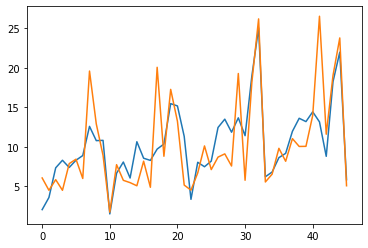

In [325]:
plt.plot(y_plot_pred)
plt.plot(y_plot_present)
plt.show()

In [326]:
l = []
for i in num1[-3:]:
  for j in i:
    l.append(j)

In [327]:
l

[19.039444538345894, 23.793685671331094, 5.064219693802208]

In [328]:
x_input = np.array(l)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<20):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[2.8904338]
1 day input [23.79368567  5.06421969  2.89043379]
1 day output [[6.628692]]
2 day input [5.06421969 2.89043379 6.62869215]
2 day output [[6.3194246]]
3 day input [2.8904338 6.628692  6.3194246]
3 day output [[6.522795]]
4 day input [6.628692  6.3194246 6.522795 ]
4 day output [[10.229276]]
5 day input [ 6.3194246  6.522795  10.229276 ]
5 day output [[9.936427]]
6 day input [ 6.522795 10.229276  9.936427]
6 day output [[11.663163]]
7 day input [10.229276  9.936427 11.663163]
7 day output [[13.892671]]
8 day input [ 9.936427 11.663163 13.892671]
8 day output [[12.805537]]
9 day input [11.663163 13.892671 12.805537]
9 day output [[13.245663]]
10 day input [13.892671 12.805537 13.245663]
10 day output [[12.701386]]
11 day input [12.805537 13.245663 12.701386]
11 day output [[13.448346]]
12 day input [13.245663 12.701386 13.448346]
12 day output [[13.342988]]
13 day input [12.701386 13.448346 13.342988]
13 day output [[13.268128]]
14 day input [13.448346 13.342988 13.268128]
14 

In [329]:
day_new=np.arange(1,50)
day_pred=np.arange(1,69)

In [330]:
l2 = []
for i in y_plot_pred:
  l2.append(i)
print(l2)

[2.038433, 3.5770442, 7.3361387, 8.293977, 7.3821993, 8.297778, 8.89064, 12.587582, 10.780817, 10.816431, 1.4962575, 6.6529512, 8.068485, 6.044915, 10.64241, 8.552678, 8.277511, 9.710049, 10.349911, 15.468355, 15.178141, 11.319345, 3.3438425, 8.038576, 7.4737954, 8.188222, 12.446804, 13.5012455, 11.850002, 13.670246, 11.409464, 18.951279, 25.066656, 6.203725, 6.804568, 8.624625, 9.1698265, 11.959902, 13.613884, 13.193054, 14.430019, 13.158186, 8.793966, 18.24739, 21.990522, 5.8301587]


In [331]:
for i in lst_output:
  l2.append(i)

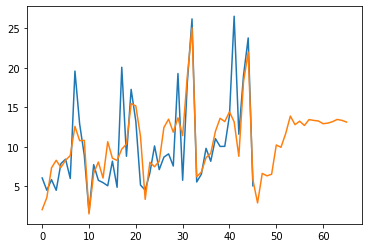

In [332]:
import matplotlib.pyplot as plt
plt.plot(y_plot_present)
plt.plot(l2)
plt.show()

In [333]:
date = pd.date_range(start='2018-02-01',end='2019-09-01', freq='MS')
lst_output_data = lst_output*min(num)

In [334]:
data3 = pd.DataFrame(date,lst_output*min(num))
data3

,0
324.916553,2018-02-01
745.137913,2018-03-01
710.372842,2018-04-01
733.233931,2018-05-01
1149.883111,2018-06-01
1116.963709,2018-07-01
1311.067837,2018-08-01
1561.688998,2018-09-01
1439.483245,2018-10-01
1488.958189,2018-11-01
